In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline  



In [3]:
df=pd.read_csv('./height-weight.csv')
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


Text(0, 0.5, 'Height')

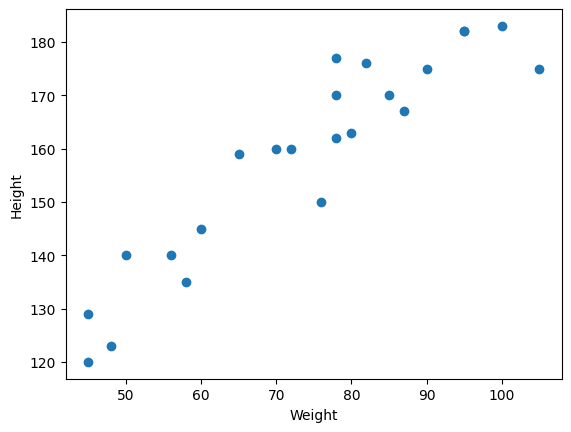

In [8]:
plt.scatter(df['Weight'],df['Height'])
plt.xlabel("Weight")
plt.ylabel("Height")

In [4]:
## divide our dataset into independent and dependent features

X = df[['Weight']] # independent will be in 2D
y = df['Height'] # dependent will be in 1D

In [5]:
	
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=40)

In [6]:
y_train

13    183
8     182
20    129
19    167
0     120
9     170
14    170
16    140
10    176
3     145
2     123
21    140
12    175
1     135
18    150
5     162
7     175
6     163
Name: Height, dtype: int64

In [7]:
y_test

22    160
17    159
11    182
15    177
4     160
Name: Height, dtype: int64

In [8]:
	
## Standardize the dataset
## so,that both weight and height have the same unit

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

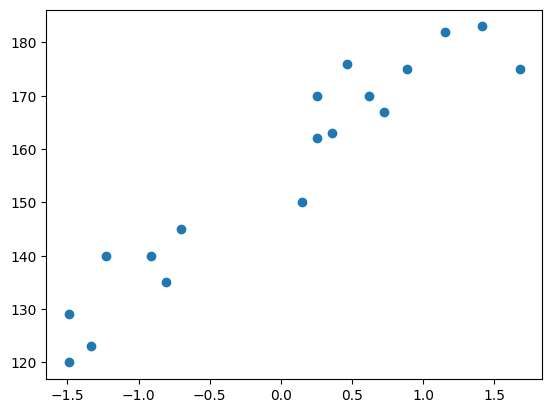

In [9]:
plt.scatter(X_train,y_train)

In [10]:
from sklearn.linear_model import LinearRegression

In [11]:
regressor = LinearRegression()

In [12]:
regressor

LinearRegression()

In [13]:
type(X_train)

numpy.ndarray

In [14]:
type(X_test)

numpy.ndarray

In [15]:
X_train=np.array(X_train).reshape(-1,1)
X_test=np.array(X_test).reshape(-1,1)

In [16]:
y_train.shape

(18,)

In [17]:
X_train.shape

(18, 1)

In [18]:
regressor.fit(X_train,y_train)

LinearRegression()

In [19]:
## coefficient and intercepts
print("Coefficient : ",regressor.coef_)
print("Intercept : ",regressor.intercept_)

Coefficient :  [19.2174361]
Intercept :  155.83333333333334


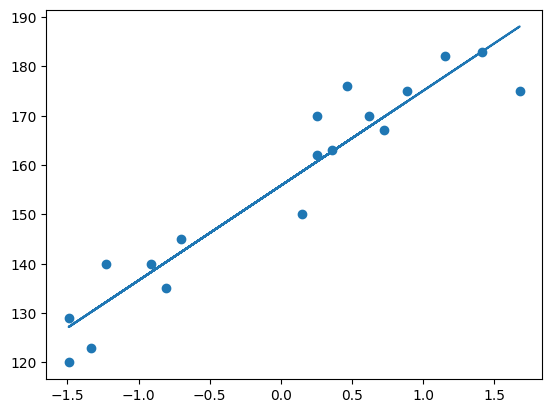

In [27]:
plt.scatter(X_train,y_train)
plt.plot(X_train,regressor.predict(X_train))

	
## prediction of train data
1. predicted height output= intercept +coef_(Weights)

 2 . y_pred_train =65.4364 + 1.26(X_train)
## prediction of test data
1. predicted height output= intercept +coef_(Weights)

2. y_pred_test =65.4364 + 1.26(X_test)

In [20]:
y_pred_test=regressor.predict(X_test)

In [21]:
y_test

22    160
17    159
11    182
15    177
4     160
Name: Height, dtype: int64

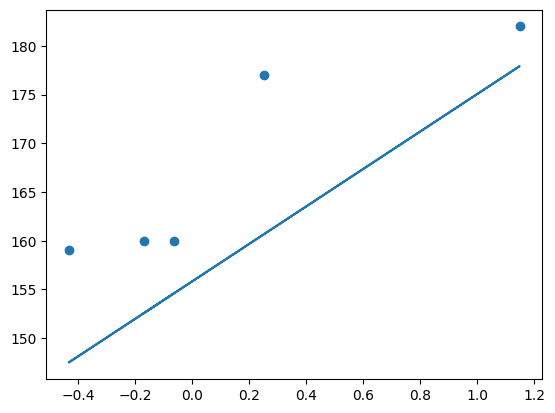

In [22]:
plt.scatter(X_test,y_test)
plt.plot(X_test,regressor.predict(X_test))

In [23]:
### Performance metrics

from sklearn.metrics import mean_squared_error,mean_absolute_error

In [24]:
mse=mean_squared_error(y_test,y_pred_test)
mae=mean_absolute_error(y_test,y_pred_test)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

99.975524652846
8.94865478566022
9.998776157752808


In [25]:
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred_test)

In [26]:
print(score)

-0.030250666249443503


## R square
Formula

R^2 = 1 - SSR/SST

R^2 = coefficient of determination SSR = sum of squares of residuals SST = total sum of squares

In [27]:
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred_test)
print(score)

-0.030250666249443503


	
Adjusted R2 = 1 – [(1-R2)*(n-1)/(n-k-1)]

where:

R2: The R2 of the model n: The number of observations k: The number of predictor variables

In [28]:
#display adjusted R-squared
1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

-0.3736675549992581

In [41]:
regressor.predict(scaler.transform([[75]]))

/Volumes/essd/ai/code/ds_ml_dl/mlcodes/01_LinearRegression/venvmlcode/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([157.63686094])

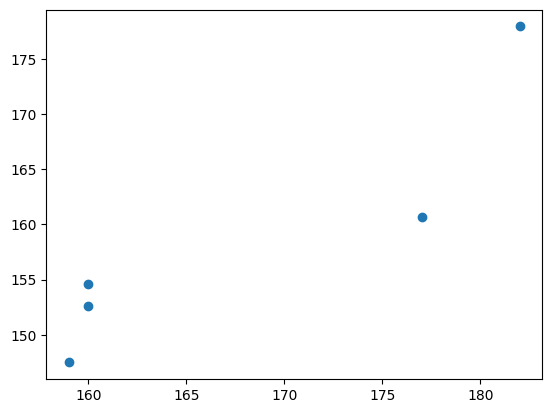

In [42]:
## Assumptions

## plot a scatter plot for the prediction
plt.scatter(y_test,y_pred_test)

In [43]:
## Residuals
residuals=y_test-y_pred_test

residuals

22     5.406592
17    11.507982
11     4.073454
15    16.319686
4      7.435560
Name: Height, dtype: float64

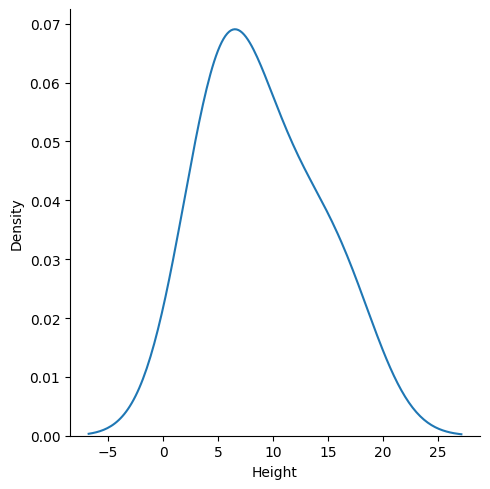

In [47]:
## Plot this residuals 
import seaborn as sns
sns.displot(residuals,kind="kde")

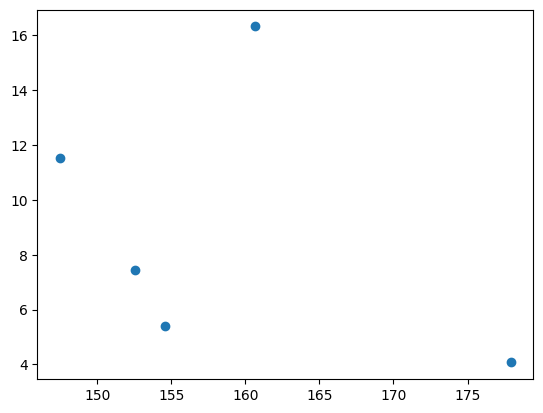

: 

In [ ]:
## Scatter plot with respect to prediction and residuals
## uniform distribution
plt.scatter(y_pred_test,residuals)